In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, f1_score
from sklearn import model_selection
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
%matplotlib inline

### Loading clean data into a DataFrame.

In [2]:
stats_df = pd.read_csv('NBA_clean_data.csv')
stats_df

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
0,2021,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,737.0,124.0,228.0,...,73.0,135.0,208.0,29.0,20.0,28.0,43.0,91.0,304.0,16.64
1,2021,Steven Adams,C,27.0,NOP,58.0,58.0,1605.0,189.0,308.0,...,213.0,301.0,514.0,111.0,54.0,38.0,78.0,113.0,438.0,17.29
2,2021,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,142.0,431.0,573.0,346.0,75.0,66.0,169.0,145.0,1197.0,26.39
3,2021,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,674.0,140.0,296.0,...,19.0,99.0,118.0,49.0,11.0,29.0,27.0,47.0,352.0,18.82
4,2021,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,13.0,1007.0,192.0,458.0,...,13.0,131.0,144.0,102.0,47.0,22.0,69.0,88.0,508.0,15.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12234,1990,Mike Woodson,SG,31.0,HOU,61.0,11.0,972.0,160.0,405.0,...,25.0,63.0,88.0,66.0,42.0,11.0,49.0,100.0,394.0,10.00
12235,1990,Orlando Woolridge,SF,30.0,LAL,62.0,2.0,1421.0,306.0,550.0,...,49.0,136.0,185.0,96.0,39.0,46.0,73.0,160.0,788.0,19.81
12236,1990,James Worthy*,SF,28.0,LAL,80.0,80.0,2960.0,711.0,1298.0,...,160.0,318.0,478.0,288.0,99.0,49.0,160.0,190.0,1685.0,22.09
12237,1990,Danny Young,PG,27.0,POR,82.0,8.0,1393.0,138.0,328.0,...,29.0,93.0,122.0,231.0,82.0,4.0,80.0,84.0,383.0,13.22


In [3]:
# Making sure each player only appears once in the DataFrame.

stats_df.drop_duplicates(subset='Player', inplace=True)
stats_df

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
0,2021,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,737.0,124.0,228.0,...,73.0,135.0,208.0,29.0,20.0,28.0,43.0,91.0,304.0,16.64
1,2021,Steven Adams,C,27.0,NOP,58.0,58.0,1605.0,189.0,308.0,...,213.0,301.0,514.0,111.0,54.0,38.0,78.0,113.0,438.0,17.29
2,2021,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,142.0,431.0,573.0,346.0,75.0,66.0,169.0,145.0,1197.0,26.39
3,2021,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,674.0,140.0,296.0,...,19.0,99.0,118.0,49.0,11.0,29.0,27.0,47.0,352.0,18.82
4,2021,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,13.0,1007.0,192.0,458.0,...,13.0,131.0,144.0,102.0,47.0,22.0,69.0,88.0,508.0,15.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12213,1990,Chris Welp,C,26.0,TOT,27.0,3.0,198.0,23.0,61.0,...,18.0,30.0,48.0,9.0,6.0,8.0,15.0,58.0,65.0,7.81
12227,1990,Mike Williams,PF-SF,26.0,TOT,21.0,0.0,102.0,6.0,18.0,...,5.0,18.0,23.0,2.0,3.0,7.0,3.0,30.0,15.0,4.06
12233,1990,Leon Wood,SG,27.0,NJN,28.0,2.0,200.0,16.0,49.0,...,1.0,11.0,12.0,47.0,6.0,0.0,8.0,16.0,50.0,11.76
12234,1990,Mike Woodson,SG,31.0,HOU,61.0,11.0,972.0,160.0,405.0,...,25.0,63.0,88.0,66.0,42.0,11.0,49.0,100.0,394.0,10.00


### Resetting indices and making a new column - the average points of each player per game.
### We divide points per season by total games.

In [4]:
stats_df.reset_index(drop=True, inplace=True)
stats_df['AVGPTSPerGame'] = stats_df['PTS'] / stats_df['G']
stats_df

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,AVGPTSPerGame
0,2021,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,737.0,124.0,228.0,...,135.0,208.0,29.0,20.0,28.0,43.0,91.0,304.0,16.64,4.983607
1,2021,Steven Adams,C,27.0,NOP,58.0,58.0,1605.0,189.0,308.0,...,301.0,514.0,111.0,54.0,38.0,78.0,113.0,438.0,17.29,7.551724
2,2021,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,431.0,573.0,346.0,75.0,66.0,169.0,145.0,1197.0,26.39,18.703125
3,2021,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,674.0,140.0,296.0,...,99.0,118.0,49.0,11.0,29.0,27.0,47.0,352.0,18.82,13.538462
4,2021,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,13.0,1007.0,192.0,458.0,...,131.0,144.0,102.0,47.0,22.0,69.0,88.0,508.0,15.92,11.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,1990,Chris Welp,C,26.0,TOT,27.0,3.0,198.0,23.0,61.0,...,30.0,48.0,9.0,6.0,8.0,15.0,58.0,65.0,7.81,2.407407
2194,1990,Mike Williams,PF-SF,26.0,TOT,21.0,0.0,102.0,6.0,18.0,...,18.0,23.0,2.0,3.0,7.0,3.0,30.0,15.0,4.06,0.714286
2195,1990,Leon Wood,SG,27.0,NJN,28.0,2.0,200.0,16.0,49.0,...,11.0,12.0,47.0,6.0,0.0,8.0,16.0,50.0,11.76,1.785714
2196,1990,Mike Woodson,SG,31.0,HOU,61.0,11.0,972.0,160.0,405.0,...,63.0,88.0,66.0,42.0,11.0,49.0,100.0,394.0,10.00,6.459016


In [5]:
# Checking if there's a connection between average points per game for each player and his PER.

correlation = stats_df['AVGPTSPerGame'].corr(stats_df['PER'])
correlation

0.7228979528965068

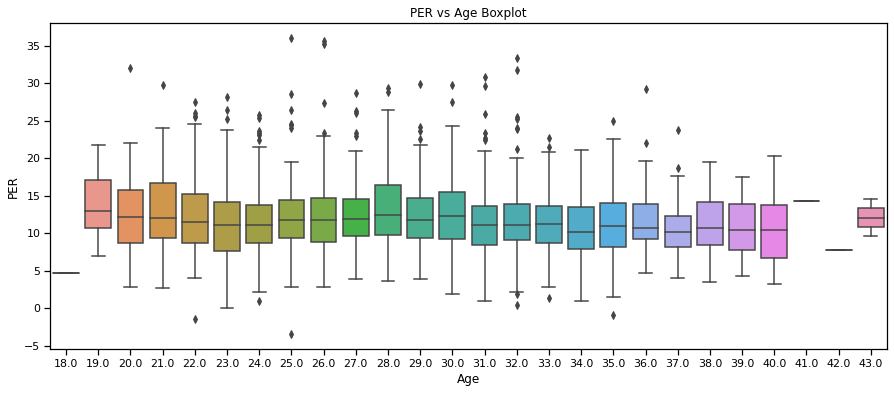

In [7]:
## Here we display each age and his PER.
plt.figure(figsize=(15,6))
sns.set_context('notebook')
sns.boxplot(x = stats_df['Age'], 
y = stats_df['PER'])
plt.title('PER vs Age Boxplot');

### From looking at the boxplot, we can see that the best positive trend is between ages 24-28.

In [8]:
# Splitting the data to train and test.

X_train, X_test, y_train, y_test = train_test_split(stats_df.drop(["Player", "Year", "Pos", "Tm", "FG%", "3P%", "2P%",
                                                                       "eFG%", "FT%", "3P", "FT", "2P", "FG", "PER",
                                                                   "AVGPTSPerGame", "PTS"], axis=1)
                                                                       , stats_df["AVGPTSPerGame"], random_state=42, test_size=0.2)

### Machine Learning

In [9]:
# Training a LinearRegression model.

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [10]:
# Prediction.

y_pred = clf.predict(X_test)

### Evaluation with r2 score.

In [11]:
score = metrics.r2_score(y_test, y_pred)
score

0.923184704871755

In [12]:
# Displaying the difference between actual values and predicted values in a DataFrame.

compare_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':abs(y_test-y_pred)})
compare_df

,Actual,Predicted,Difference
427,27.000000,24.800989,2.199011
1128,3.324324,3.231805,0.092519
367,9.295082,9.347743,0.052661
1771,5.682927,5.135177,0.547750
350,5.260870,4.575677,0.685192
...,...,...,...
1182,7.538462,6.904852,0.633610
2003,12.662162,15.186151,2.523989
479,2.468750,3.298408,0.829658
680,4.875000,4.904634,0.029634


Text(0, 0.5, 'Predicted')

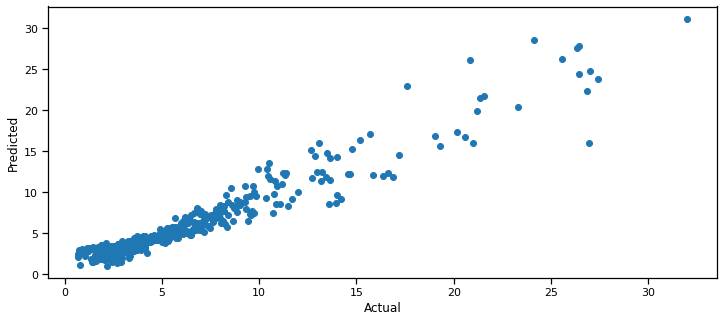

In [13]:
# Plotting actual values with the predicted values.

plt.figure(figsize=(12,5))
plt.scatter(compare_df['Actual'], compare_df['Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')